# <center>ALGORITHMES DE DETECTION DU WHEEL-SPINNING    *(EVIDENCE B)* : TRANSFERT LEARNING ENTRE LES MODULES D'ATTICUS<center/>

## Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import lstm_ws_all_functions as ls
import lstm_ws_prediction as ls_pred
from Graphs import requirements_functions as rq
from sklearn.metrics import precision_score, recall_score 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

## Entraînement d'un LSTM sur AdaptivFraction

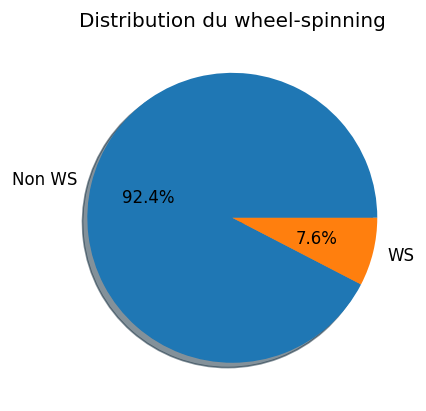

Traitement fold #0 : OK !
Traitement fold #1 : OK !
Traitement fold #2 : OK !
Traitement fold #3 : OK !
Traitement fold #4 : OK !


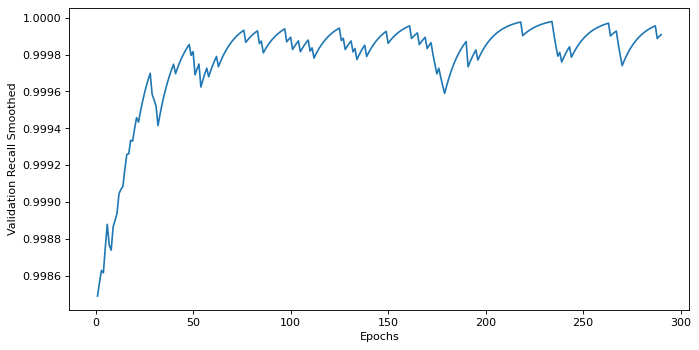

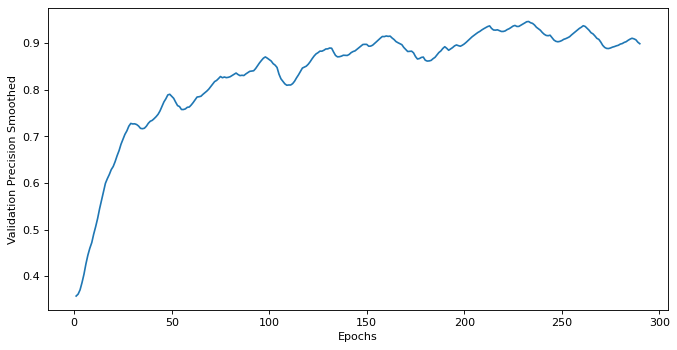

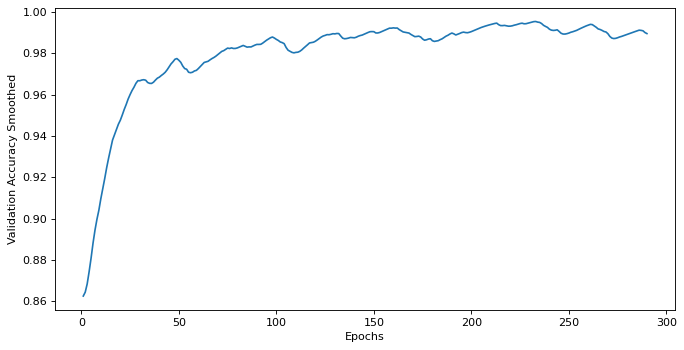

Entraînement par Validation Croisée et fine-turning terminé !
Entrainement, avec fine turning obtenue par VC, sur le jeu de données total terminé !
Modèle enregistré dans le repertoire courant : ws_model.h5 !


In [2]:
DUMP_ROOT = "https://raw.githubusercontent.com/EvidenceB/wheel-spinning/main/Scripts/Datasets/dump.csv"
GITHUB_TOKEN = "token=ANA3ZLCPB2JTBVVQX64LD7DBKFH4W"
DUMP_URL = DUMP_ROOT + "?" + GITHUB_TOKEN
load_data = ls.fetch_data(DUMP_URL)
json_adafrac = rq.json_reader("Graphs/config_adaptivfrac.json")
data_adafrac = ls.select_application(json_adafrac, load_data)
data_adafrac = ls.mastery_building(data_adafrac)
data_adafrac = ls.ws_building(data_adafrac)
X_train, y_train = ls.preprocessing_for_nn(data_adafrac)
ls.train_lstm(X_train, y_train)

## Transfert d'apprentissage sur atticus

### Transfert :

In [3]:
json_atticus = rq.json_reader("Graphs/config_atticus.json")
data_atticus = ls.select_application(json_atticus, load_data)

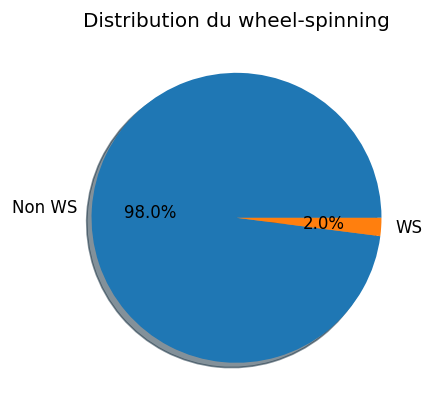

In [4]:
#calcul de la vraie étiquette de atticus (mais aussi de la matrice de design pour plus tard: entrainement sur atticus)
data_atticus = ls.mastery_building(data_atticus)
data_atticus = ls.ws_building(data_atticus)
X_train, y_train = ls.preprocessing_for_nn(data_atticus)

In [5]:
X_atticus_trans = ls_pred.preprocessing_for_nn_inference(data_atticus)
y_trans_atticus, y_trans_atticus_class = ls_pred.prediction_nn(X_atticus_trans)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_5 (Masking)          (None, 20, 3)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 20, 64)            17408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________
None


### Evaluation du transfert

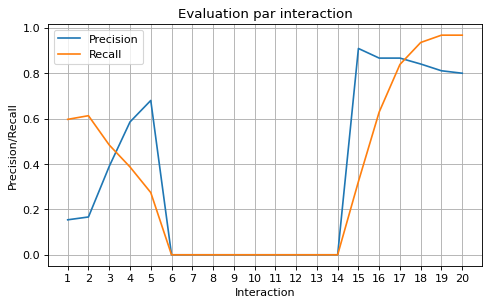

In [6]:
precision = []
recall = []
threshold = 0.5
a = y_train

for trunc in range(1,21):
    
    X_test_trunc = X_atticus_trans[:, :trunc, :]
    X_test_trunc_pad = pad_sequences(X_test_trunc, maxlen=20, dtype="float32", value = -10., padding="post")
    
    model = load_model('ws_model.h5')
    y_pred_trunc = model.predict(X_test_trunc_pad)
    y_pred_trunc_class = np.where(y_pred_trunc > threshold, 1, 0)

    b = y_pred_trunc_class
    precision.append(precision_score(a,b))
    recall.append(recall_score(a,b))
        
x = np.array(list(range(1,21)))
y1 = np.array(precision)
y2 = np.array(recall)

plt.figure(dpi = 80, figsize = (7,4))
plt.plot(x , y1, label = "Precision")
plt.plot(x , y2, label = "Recall")
plt.xlabel("Interaction")
plt.ylabel("Precision/Recall")
plt.title("Evaluation par interaction")
plt.xticks(range(1,21))
plt.grid()
plt.legend()
plt.savefig("atticus_lstm_transfert.png", dpi = 100)
plt.show() 

### Entrainement d'atticus directement et son évaluation

Traitement fold #0 : OK !
Traitement fold #1 : OK !
Traitement fold #2 : OK !
Traitement fold #3 : OK !
Traitement fold #4 : OK !


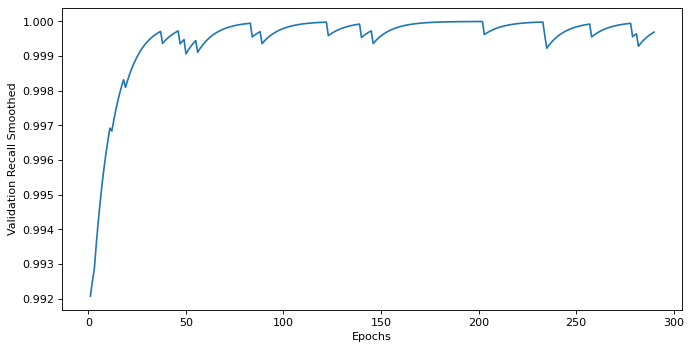

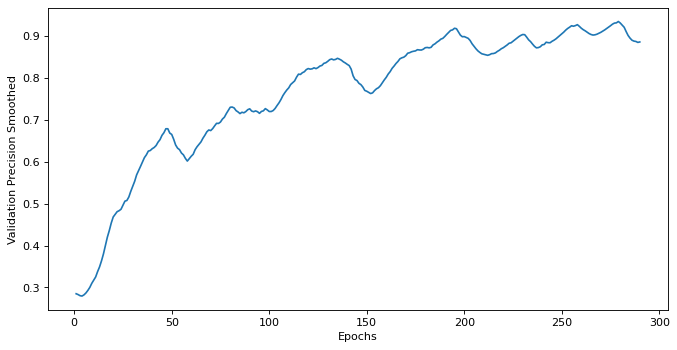

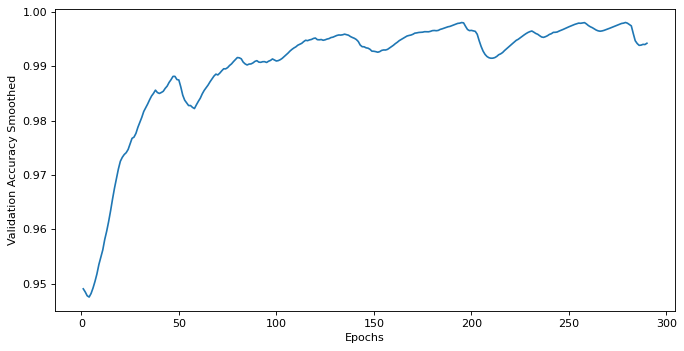

Entraînement par Validation Croisée et fine-turning terminé !
Entrainement, avec fine turning obtenue par VC, sur le jeu de données total terminé !
Modèle enregistré dans le repertoire courant : ws_model.h5 !


In [7]:
ls.train_lstm(X_train, y_train)
model = load_model('ws_model.h5')
y_pred_atticus = model.predict(X_train)
y_pred_atticus_class = np.where(y_pred_atticus > 0.5, 1, 0)

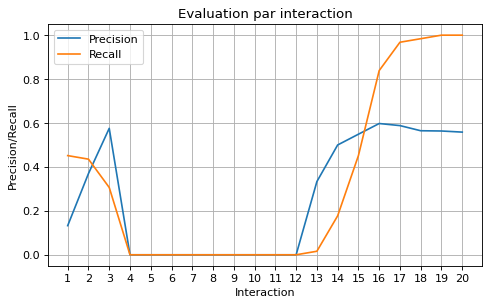

In [11]:
precision = []
recall = []
threshold = 0.5
a = y_train

for trunc in range(1,21):
    
    X_test_trunc = X_train[:, :trunc, :]
    X_test_trunc_pad = pad_sequences(X_test_trunc, maxlen=20, dtype="float32", value = -10., padding="post")
    
    model = load_model('ws_model.h5')
    y_pred_trunc = model.predict(X_test_trunc_pad)
    y_pred_trunc_class = np.where(y_pred_trunc > threshold, 1, 0)

    b = y_pred_trunc_class
    precision.append(precision_score(a,b))
    recall.append(recall_score(a,b))
        
x = np.array(list(range(1,21)))
y1 = np.array(precision)
y2 = np.array(recall)

plt.figure(dpi = 80, figsize = (7,4))
plt.plot(x , y1, label = "Precision")
plt.plot(x , y2, label = "Recall")
plt.xlabel("Interaction")
plt.ylabel("Precision/Recall")
plt.title("Evaluation par interaction")
plt.xticks(range(1,21))
plt.grid()
plt.legend()
plt.savefig("atticus_lstm_direct.png", dpi = 100)
plt.show() 

### Comparaison du transfert aux résultats obtenu sur entrainement d'atticus directement

RESULAT DU TRANSFERT


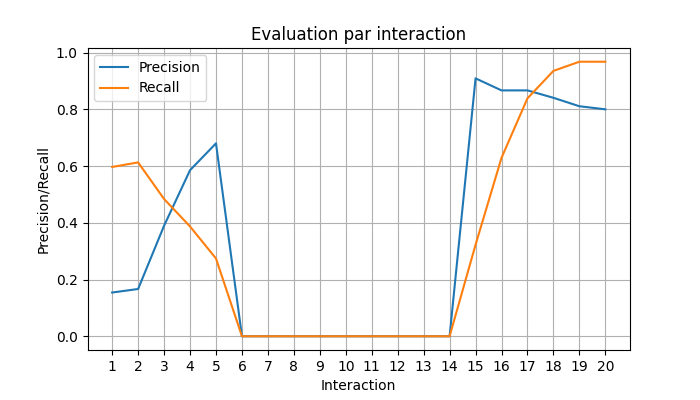

In [12]:
print("RESULAT DU TRANSFERT")
path="atticus_lstm_transfert.png"
display(Image.open(path))

RESULAT D'UN ENTRAINEMENT DIRECT


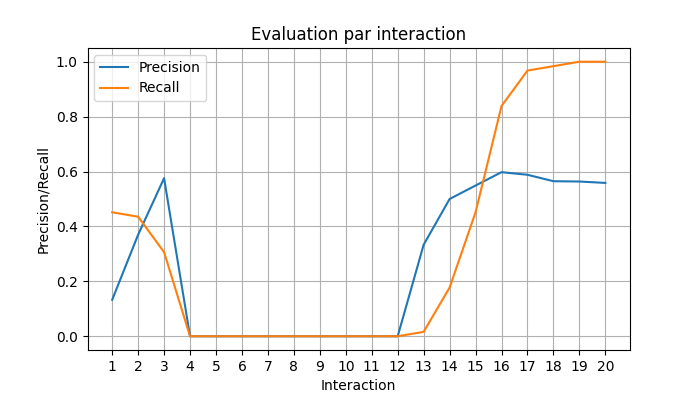

In [13]:
print("RESULAT D'UN ENTRAINEMENT DIRECT")
path="atticus_lstm_direct.png"
display(Image.open(path))